MNIST - Modified National Institute of Standards and Technology

large database of handwritten digits

it has 70000 images 28x28 sizes images of 0-9

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
# to drop neurons in hidden layers
from tensorflow.keras.layers import Dropout
# dense layers also fully connected layers
from tensorflow.keras.layers import Dense

In [3]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


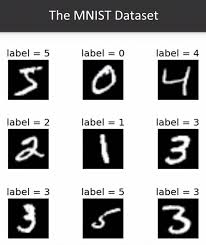

In [4]:
xtrain.shape # 60000 images size 28,28

(60000, 28, 28)

In [5]:
ytrain.shape

(60000,)

In [6]:
xtest.shape # 10000 test data

(10000, 28, 28)

In [7]:
ytest.shape

(10000,)

In [8]:
# first index- rows(data),1,2 -shape
# 1- grey color, 3- RGB - color channels
xtrain=xtrain.reshape((xtrain.shape[0],xtrain.shape[1],xtrain.shape[2],1))
xtest=xtest.reshape((xtest.shape[0],xtest.shape[1],xtest.shape[2],1))

In [9]:
xtrain.shape[0]

60000

In [11]:
xtrain.shape[1],xtrain.shape[2]

(28, 28)

In [12]:
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


CNN converges faster on grey scale(0,1) data than on rgb(0,255)

we perform grayscale normalization to reduce the effect of illuminations differences

In [13]:
# normalizing the pixel values
xtrain=xtrain/255
xtest=xtest/255

In [14]:
xtrain

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [15]:
# Model Building
model = Sequential()

In [17]:
# adding convolution layer
# 32- number of filters or kernels
# (3,3) filter pixel size
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))

In [18]:
# adding pooling layer 2x2 matrix
model.add(MaxPool2D(2,2))

In [19]:
# adding fully connected layer
model.add(Flatten())

In [20]:
# add a new hidden layer with 100 neurons and relu activation
model.add(Dense(100,activation='relu'))

In [21]:
# add output layer - probability
# 10 output classes
model.add(Dense(10,activation='softmax'))

In [22]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

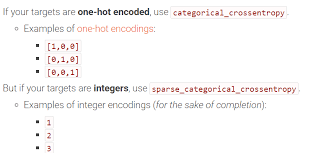

In [23]:
# fit the model
model.fit(xtrain,ytrain,epochs=10) # 10 iterations

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 94s 49ms/step - accuracy: 0.9238 - loss: 0.2575
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 49ms/step - accuracy: 0.9873 - loss: 0.0406
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.9930 - loss: 0.0235
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 49ms/step - accuracy: 0.9945 - loss: 0.0163
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 49ms/step - accuracy: 0.9962 - loss: 0.0112
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 49ms/step - accuracy: 0.9964 - loss: 0.0098
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 49ms/step - accuracy: 0.9981 - loss: 0.0056
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 49ms/step - accuracy: 0.9978 - loss: 0.0063
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 141s 49ms/step - accuracy: 0.9990 - loss: 0.0029
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 49ms/step - accuracy: 0.9980 - loss: 0.0056


In [24]:
# 60000 training images
# 32 filter - kernels
60000/32
# batches or steps 1875

1875.0

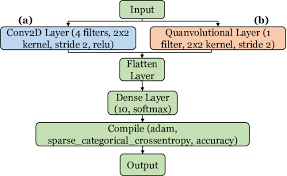

In [25]:
# Evaluating the model
score=model.evaluate(xtest,ytest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9809 - loss: 0.0946


In [26]:
score[0] # loss

0.0702952966094017

In [27]:
score[1] # accuracy

0.9861000180244446

In [30]:
from sklearn.metrics import classification_report
import numpy as np

# predict the classes - gives probability
ypred_prob=model.predict(xtest)

# find output with max probability
ypred= np.argmax(ypred_prob,axis=1)

# classification report
print("Classification Report \n",classification_report(ytest,ypred))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Classification Report 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.96      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.97      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ypred))

[[ 977    0    1    0    0    1    0    1    0    0]
 [   0 1125    2    1    0    4    2    1    0    0]
 [   2    1 1023    2    0    0    0    4    0    0]
 [   0    0    0  998    0    9    0    2    0    1]
 [   0    0    0    0  967    0    6    0    1    8]
 [   0    0    1    2    0  886    2    0    0    1]
 [   2    2    0    1    1    4  948    0    0    0]
 [   0    1    9    0    0    0    0 1017    0    1]
 [   5    0    6    3    0    5    4    5  942    4]
 [   0    0    2    4    3   10    0    9    3  978]]
